
**Проект по курсу "Искусственный интеллект"**





Распознавание рукописных цифр из базы данных MNIST с помощью Keras.



**Импорт необходимых библиотек и датасета.**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from subprocess import check_output
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split




In [ ]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Визуализация содержимого датасета**

In [ ]:
z_train = Counter(train['label'])
z_train

Counter({0: 4132,
         1: 4684,
         2: 4177,
         3: 4351,
         4: 4072,
         5: 3795,
         6: 4137,
         7: 4401,
         8: 4063,
         9: 4188})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


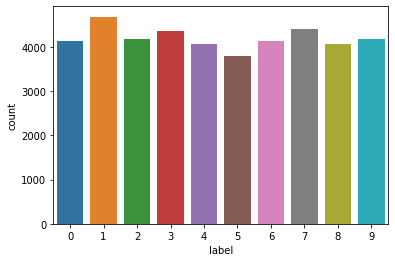

In [ ]:
sns.countplot(train['label'])


In [ ]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
x_train = train.iloc[:,1:].values.astype('float32')
y_train = train['label'].values.astype('int32')
x_test = test.values.astype('float32')



In [ ]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

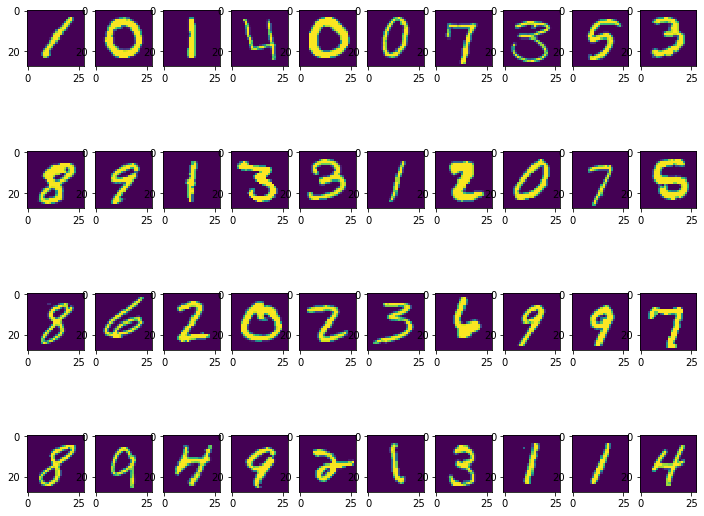

In [ ]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):
  plt.subplot(y,x,i+1)
  plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

**Нормализация данных**

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0



In [ ]:
y_train


array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

**Вывод формы датасета**

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (42000, 784)
42000 train samples
28000 test samples


**Подгон датасета под требования keras**

In [ ]:
X_train = x_train.reshape(x_train.shape[0], 28, 28,1)
y_train = keras.utils.to_categorical(y_train, 10)
X_test = x_test.reshape(x_test.shape[0], 28, 28,1)


**Разбиение данных на тренировочную и тестовую выборку**

In [ ]:

X_train, X_val, Y_train, Y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=42)


**Модель сверточной нейронной сети**

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

**Визуализация модели нейронной сети**

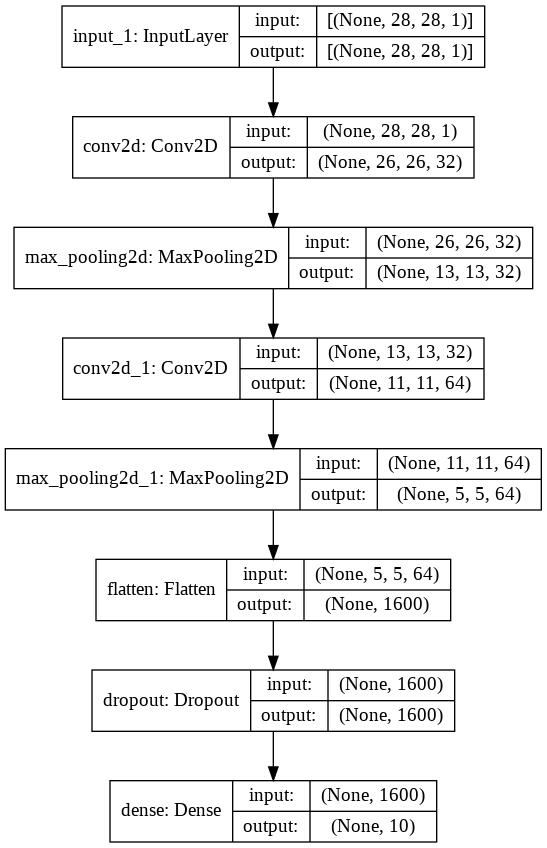

In [ ]:
keras.utils.plot_model(model, to_file='model_1.png', show_shapes=True)


**Компиляция модели**

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

**Обучение на тренировочной выборке**

In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=15, validation_split=0.1, verbose = 1)


Epoch 1/15
266/266 [==============================] - 25s 91ms/step - loss: 0.8231 - accuracy: 0.7516 - val_loss: 0.1308 - val_accuracy: 0.9635
Epoch 2/15
266/266 [==============================] - 24s 90ms/step - loss: 0.1444 - accuracy: 0.9551 - val_loss: 0.0982 - val_accuracy: 0.9709
Epoch 3/15
266/266 [==============================] - 24s 89ms/step - loss: 0.1063 - accuracy: 0.9665 - val_loss: 0.0668 - val_accuracy: 0.9817
Epoch 4/15
266/266 [==============================] - 24s 90ms/step - loss: 0.0851 - accuracy: 0.9733 - val_loss: 0.0607 - val_accuracy: 0.9836
Epoch 5/15
266/266 [==============================] - 24s 91ms/step - loss: 0.0732 - accuracy: 0.9775 - val_loss: 0.0527 - val_accuracy: 0.9862
Epoch 6/15
266/266 [==============================] - 24s 89ms/step - loss: 0.0630 - accuracy: 0.9805 - val_loss: 0.0479 - val_accuracy: 0.9857
Epoch 7/15
266/266 [==============================] - 24s 89ms/step - loss: 0.0599 - accuracy: 0.9807 - val_loss: 0.0483 - val_accuracy:

**Оценка модели**


In [ ]:
final_loss, final_acc = model.evaluate(X_val, Y_val, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))


Final loss: 0.037431, final accuracy: 0.988333


**Построение матрицы ошибок**

In [ ]:
def plot_confusion_matrix(cm, classes, normalize = False, title='Матрица ошибок', cmap = plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Настоящее значение')
    plt.xlabel('Предсказанное значение')


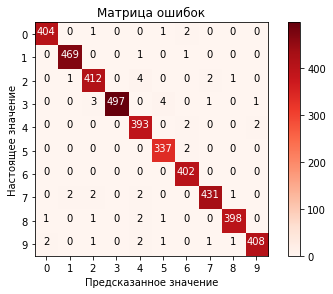

In [ ]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true = np.argmax(Y_val, axis = 1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes = range(10))

**Построение графика потерь и графика точности**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


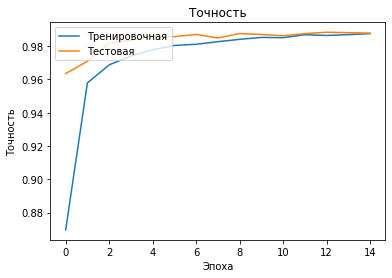

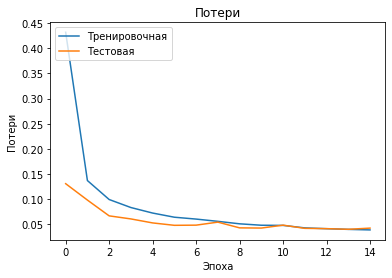

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность')
plt.ylabel('Точность')
plt.xlabel('Эпоха')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери')
plt.ylabel('Потери')
plt.xlabel('Эпоха')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred, axis = 1)
Y_true_classes = np.argmax(Y_val, axis = 1)


In [ ]:
Y_pred_classes[:5], Y_true_classes[:5]


(array([8, 1, 9, 9, 8]), array([8, 1, 9, 9, 8]))

**Итоговые результаты**

In [ ]:
from sklearn.metrics import classification_report
target_names = ["Класс {}".format(i) for i in range(10)]
print(classification_report(Y_true_classes, Y_pred_classes, target_names=target_names, digits = 5))


              precision    recall  f1-score   support

     Класс 0    0.99263   0.99020   0.99141       408
     Класс 1    0.99364   0.99575   0.99470       471
     Класс 2    0.98095   0.98095   0.98095       420
     Класс 3    1.00000   0.98221   0.99103       506
     Класс 4    0.97277   0.98992   0.98127       397
     Класс 5    0.97965   0.99410   0.98682       339
     Класс 6    0.98289   1.00000   0.99137       402
     Класс 7    0.99080   0.98402   0.98740       438
     Класс 8    0.99252   0.98759   0.99005       403
     Класс 9    0.99270   0.98077   0.98670       416

    accuracy                        0.98833      4200
   macro avg    0.98786   0.98855   0.98817      4200
weighted avg    0.98841   0.98833   0.98834      4200



**Предсказание для тестовой выборки**

In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=-1)
submissions=pd.DataFrame({"ImageId": list(range(1,len(predicted_classes)+1)),
                         "Label": predicted_classes})
submissions.to_csv("result.csv", index=False, header=True)


In [ ]:
result = pd.read_csv("result.csv")
result.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
